# Analyzing Defaulted Loans from Prosper Data set
## by Prashanth Chandrasekar


Propser is the world's first Modern peer-to-peer lending marketplace that tries to match borrower and lenders.

Prosper has a non-traditional loan model with several key advantages over traditional banks. 
The E-business commerce setup reduces fixed costs borne by physical infrastructure (e.g. bank branches) and automation, databases, software and technology improve and expedite the borrowing and loaning experience.
The loans are unsecured, in that there is no collateral a borrower needs to put up, that could get taken away in lieu of payments.
There are multiple people investing in an amount for one person that needs a loan.

In the last few years, with the advent of peer-to-peer markets and of fintech companies that try to disrupt the banking ecosystem,
there has been one major issue that is still yet to be resolved by these new players: Interest rates have been quite signifcantly expensive than
what major banks offer. The reason why Propser and similar peer-to-peer online marketplaces increase interest rates is primarily due to the signifcant default rates they would encounter.

In this analysis, I try to explore good loans and defaulted loans, and the reasons to why a loan is defaulted when another is not.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# Preliminary Data Wrangling

Let's load our dataset. The Prosper Loan Dataset hosted on AWS contains observations for loan listings of 113066 listed loans on their website. The dataset contains 113667 observations and 81 columns, although not all columns will be included for the final exploration analysis.

I am going to collect a few columns here that I feel will be helpful in determining whether a loan listing will default or not.

In [2]:
data = pd.read_csv("https://s3.amazonaws.com/udacity-hosted-downloads/ud651/prosperLoanData.csv")

In [3]:
print (data.head())

                ListingKey  ListingNumber            ListingCreationDate  \
0  1021339766868145413AB3B         193129  2007-08-26 19:09:29.263000000   
1  10273602499503308B223C1        1209647  2014-02-27 08:28:07.900000000   
2  0EE9337825851032864889A          81716  2007-01-05 15:00:47.090000000   
3  0EF5356002482715299901A         658116  2012-10-22 11:02:35.010000000   
4  0F023589499656230C5E3E2         909464  2013-09-14 18:38:39.097000000   

  CreditGrade  Term LoanStatus           ClosedDate  BorrowerAPR  \
0           C    36  Completed  2009-08-14 00:00:00      0.16516   
1         NaN    36    Current                  NaN      0.12016   
2          HR    36  Completed  2009-12-17 00:00:00      0.28269   
3         NaN    36    Current                  NaN      0.12528   
4         NaN    36    Current                  NaN      0.24614   

   BorrowerRate  LenderYield    ...     LP_ServiceFees  LP_CollectionFees  \
0        0.1580       0.1380    ...            -133.18   

In [4]:
len(data["ListingKey"].unique())

113066

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

### Assessing and Cleaning Data

It appears that there are several columns that have null values. However, since this dataset is avery large one, I am culling down the number of columns to the ones that appear to be of interest.

In [6]:
columns_of_interest = ["ListingKey","ListingCreationDate","Term","LoanStatus","BorrowerAPR",
                       "BorrowerRate","LenderYield","EstimatedEffectiveYield","EstimatedLoss","EstimatedReturn",
                       "ProsperScore","Occupation","EmploymentStatus","IsBorrowerHomeowner","CurrentDelinquencies",
                       "AmountDelinquent","DebtToIncomeRatio","IncomeRange","TotalProsperLoans","MonthlyLoanPayment",
                       "CreditScoreRangeLower","CreditScoreRangeUpper","OpenCreditLines","OpenRevolvingAccounts","OpenRevolvingMonthlyPayment",
                       "LoanMonthsSinceOrigination", "LoanNumber", "LoanOriginalAmount", "LoanOriginationDate",
                       "LP_CustomerPayments","LP_CustomerPrincipalPayments","LP_InterestandFees","LP_ServiceFees",
                       "LP_CollectionFees","LP_GrossPrincipalLoss","LP_NetPrincipalLoss","LP_NonPrincipalRecoverypayments","PercentFunded",
                       "Investors"]
                       

In [7]:
prosperLoanData = data[columns_of_interest]

In [8]:
prosperLoanData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 39 columns):
ListingKey                         113937 non-null object
ListingCreationDate                113937 non-null object
Term                               113937 non-null int64
LoanStatus                         113937 non-null object
BorrowerAPR                        113912 non-null float64
BorrowerRate                       113937 non-null float64
LenderYield                        113937 non-null float64
EstimatedEffectiveYield            84853 non-null float64
EstimatedLoss                      84853 non-null float64
EstimatedReturn                    84853 non-null float64
ProsperScore                       84853 non-null float64
Occupation                         110349 non-null object
EmploymentStatus                   111682 non-null object
IsBorrowerHomeowner                113937 non-null bool
CurrentDelinquencies               113240 non-null float64
AmountDelinquent  

In [9]:
prosperLoanData.isnull().sum(axis=0)

ListingKey                             0
ListingCreationDate                    0
Term                                   0
LoanStatus                             0
BorrowerAPR                           25
BorrowerRate                           0
LenderYield                            0
EstimatedEffectiveYield            29084
EstimatedLoss                      29084
EstimatedReturn                    29084
ProsperScore                       29084
Occupation                          3588
EmploymentStatus                    2255
IsBorrowerHomeowner                    0
CurrentDelinquencies                 697
AmountDelinquent                    7622
DebtToIncomeRatio                   8554
IncomeRange                            0
TotalProsperLoans                  91852
MonthlyLoanPayment                     0
CreditScoreRangeLower                591
CreditScoreRangeUpper                591
OpenCreditLines                     7604
OpenRevolvingAccounts                  0
OpenRevolvingMon

**Quality Issues in the dataset:** <br>

**Null values:** <br>

1. TotalProsperLoans - There are 91852 null values. From the data dictionary obtained from the Prosper API docs, it appears clear that the presence of null values in this column indicates that there are no prior Prosper Loans for this borrower. Hence we can fill in a value = 0 for this column. <br>

2. Null values EstimatedEffectiveYield, EstimatedLoss, EstimatedReturn: For listing data prior to 2009, these values are going to have null values. Drop null values rows in the dataset for the CreditSCore columns. <br>

**Inconsistent data with column 'ProsperScore'** <br>

3. Improper "ProsperScore" values for the same listing keys: There are rows in the dataset that have multiple rows with the same loan ListingKey but however these have different ProsperScore values. It makes no sense for the same listing key, with all the other columns of the dataset remaining the same, just have a different risk evaluation score. These rows can be dropped from the dataframe. <br>

**Convert Date types:**
4. Convert Date columns to timestamps.



### Clean

1. There are 827 rows in the dataset where the same listingKey value contains different prosperScore values. We do not know which value of prosperScore is the right value for a ListingKey. hence we drop such rows from the dataset.



To begin, we find the columns that have more than 1 record when grouped by the ListingKey. It looks like all the 827 rows with repeated listingKey values, it is the prosperscore column value that changes.

In [21]:
listing_key_vc = data["ListingKey"].value_counts()
ind = (listing_key_vc[listing_key_vc > 1]).index
for listingkeyval in ind:
    for k in data.columns.values:
        if k != "ListingKey":
            row_count = data[data["ListingKey"] == listingkeyval][["ListingKey",k]].groupby(k).count()
            if len(row_count) > 1:
                print ("Listing Key Value: {} Column with bad data: {}".format(listingkeyval,k))

Listing Key Value: 17A93590655669644DB4C06 Column with bad data: ProsperScore
Listing Key Value: 349D3587495831350F0F648 Column with bad data: ProsperScore
Listing Key Value: 8474358854651984137201C Column with bad data: ProsperScore
Listing Key Value: DE8535960513435199406CE Column with bad data: ProsperScore
Listing Key Value: 47C1359638497431975670B Column with bad data: ProsperScore
Listing Key Value: 998535900520707355079B3 Column with bad data: ProsperScore
Listing Key Value: 556B35953912317829D9A67 Column with bad data: ProsperScore
Listing Key Value: B1B535976721132077F5F78 Column with bad data: ProsperScore
Listing Key Value: 0A0635972629771021E38F3 Column with bad data: ProsperScore
Listing Key Value: 8E40358782357887276FED9 Column with bad data: ProsperScore
Listing Key Value: E4B3359104504831149B94A Column with bad data: ProsperScore
Listing Key Value: 1CF43590627610277373CFE Column with bad data: ProsperScore
Listing Key Value: F482360179321570311CD01 Column with bad data:

Listing Key Value: EE1035933073407144B5C83 Column with bad data: ProsperScore
Listing Key Value: E21E3594567666823BD4FEF Column with bad data: ProsperScore
Listing Key Value: 64853588254785134EDBAA3 Column with bad data: ProsperScore
Listing Key Value: B7D03589593312804C36D05 Column with bad data: ProsperScore
Listing Key Value: 185F360439569801000C899 Column with bad data: ProsperScore
Listing Key Value: ED393587304809381FF5D6A Column with bad data: ProsperScore
Listing Key Value: 9E1E3595630796030AB5ADB Column with bad data: ProsperScore
Listing Key Value: 91C535951829778912FC637 Column with bad data: ProsperScore
Listing Key Value: DA783588922828144E873B1 Column with bad data: ProsperScore
Listing Key Value: 861835939698489416C5FFB Column with bad data: ProsperScore
Listing Key Value: 6DFC3591891372387BB41B2 Column with bad data: ProsperScore
Listing Key Value: 32933591536409267228F40 Column with bad data: ProsperScore
Listing Key Value: 4A8F35928914787080B121C Column with bad data:

Listing Key Value: 7B583599268763370B515C5 Column with bad data: ProsperScore
Listing Key Value: F08B35933408050923B7917 Column with bad data: ProsperScore
Listing Key Value: 4D1B3589947844616AB6C4B Column with bad data: ProsperScore
Listing Key Value: E9B8360197152237537D496 Column with bad data: ProsperScore
Listing Key Value: DD703595010863179DA8436 Column with bad data: ProsperScore
Listing Key Value: F03B3601709314958288970 Column with bad data: ProsperScore
Listing Key Value: D4813598186980424D285BA Column with bad data: ProsperScore
Listing Key Value: 94B035909835592957503E6 Column with bad data: ProsperScore
Listing Key Value: E5AB36005292413006E3F7D Column with bad data: ProsperScore
Listing Key Value: 0CF635895559781161C1DF0 Column with bad data: ProsperScore
Listing Key Value: D2A53601093111475927586 Column with bad data: ProsperScore
Listing Key Value: 9A903584852520528922785 Column with bad data: ProsperScore
Listing Key Value: AE4C359623562087211BD8B Column with bad data:

Listing Key Value: 51083590771166536FD6F41 Column with bad data: ProsperScore
Listing Key Value: F72A3598840194273D72C2B Column with bad data: ProsperScore
Listing Key Value: 1FD1359111258794616DCE8 Column with bad data: ProsperScore
Listing Key Value: 17E035962771170915118B7 Column with bad data: ProsperScore
Listing Key Value: 1EA53592979473338F69B57 Column with bad data: ProsperScore
Listing Key Value: D4293602060815307FAE6FF Column with bad data: ProsperScore
Listing Key Value: C9FF35684194774626F5F95 Column with bad data: ProsperScore
Listing Key Value: 93D035955508899504D4090 Column with bad data: ProsperScore
Listing Key Value: 8A95359025265707590BA66 Column with bad data: ProsperScore
Listing Key Value: 0C6036000415689128E6FE2 Column with bad data: ProsperScore
Listing Key Value: 54C23601428098917898B64 Column with bad data: ProsperScore
Listing Key Value: 9F3F3598049868065A10243 Column with bad data: ProsperScore
Listing Key Value: D2E33595862829977249F5F Column with bad data:

Listing Key Value: E5BD35991745482148E2571 Column with bad data: ProsperScore
Listing Key Value: 293B3593500286881664B47 Column with bad data: ProsperScore
Listing Key Value: 1F7535956894421943D2EA2 Column with bad data: ProsperScore
Listing Key Value: 72153597675060321C41A0A Column with bad data: ProsperScore
Listing Key Value: E9D63598378023534BB8248 Column with bad data: ProsperScore
Listing Key Value: 0F043596202561788EA13D5 Column with bad data: ProsperScore
Listing Key Value: AD01360177692666416E07B Column with bad data: ProsperScore
Listing Key Value: 8ABC3591334902061B54A1B Column with bad data: ProsperScore
Listing Key Value: C0913596629723207790C66 Column with bad data: ProsperScore
Listing Key Value: 95EF35973249134980B73DE Column with bad data: ProsperScore
Listing Key Value: 723A3593093499623FEE454 Column with bad data: ProsperScore
Listing Key Value: 148F358993411562516A227 Column with bad data: ProsperScore
Listing Key Value: C17535874571157867FA321 Column with bad data:

Listing Key Value: E30736036617706662D5E09 Column with bad data: ProsperScore
Listing Key Value: 482B3591121785122241362 Column with bad data: ProsperScore
Listing Key Value: B5D43595382042193A558A7 Column with bad data: ProsperScore
Listing Key Value: 4FD6359295553466739B655 Column with bad data: ProsperScore
Listing Key Value: 2D2635984503681189056B4 Column with bad data: ProsperScore
Listing Key Value: CB88359063859810124D44D Column with bad data: ProsperScore
Listing Key Value: C0DD35900729244452BB9E9 Column with bad data: ProsperScore
Listing Key Value: 782635963618283351B77CC Column with bad data: ProsperScore
Listing Key Value: D729358878305631215B1D9 Column with bad data: ProsperScore
Listing Key Value: 9276360067832614349CEB6 Column with bad data: ProsperScore
Listing Key Value: 783135899713463907D0A00 Column with bad data: ProsperScore
Listing Key Value: 4AED359809095985758FB75 Column with bad data: ProsperScore
Listing Key Value: EA9935979369268321F550F Column with bad data:

Listing Key Value: 7ADC360210433616444E918 Column with bad data: ProsperScore
Listing Key Value: 143F35915480322115CC389 Column with bad data: ProsperScore
Listing Key Value: 7C5A359032374149183CB81 Column with bad data: ProsperScore
Listing Key Value: AE2536000217065584D6C9B Column with bad data: ProsperScore
Listing Key Value: E96935954881487190BF84E Column with bad data: ProsperScore
Listing Key Value: 09A53590694248870D65AE8 Column with bad data: ProsperScore
Listing Key Value: 23AB359235855507044980A Column with bad data: ProsperScore
Listing Key Value: A0E03600580145778738628 Column with bad data: ProsperScore
Listing Key Value: 2B6A3590919863179717C4F Column with bad data: ProsperScore
Listing Key Value: 6CDA35956759283850046C2 Column with bad data: ProsperScore
Listing Key Value: 0ED935963528799464A73B9 Column with bad data: ProsperScore
Listing Key Value: C0BF35955420412920A9829 Column with bad data: ProsperScore
Listing Key Value: 07283600668933514690251 Column with bad data:

Listing Key Value: 17673590191397599B04F32 Column with bad data: ProsperScore
Listing Key Value: 6C94359890453131122A956 Column with bad data: ProsperScore
Listing Key Value: 21C43602368664016E765BC Column with bad data: ProsperScore
Listing Key Value: 7E403597616297294FA469E Column with bad data: ProsperScore
Listing Key Value: B16B36002917519592B0A7F Column with bad data: ProsperScore
Listing Key Value: 0B833593228793034176D8F Column with bad data: ProsperScore
Listing Key Value: AAB23598113665731DAA015 Column with bad data: ProsperScore
Listing Key Value: 1DD33599821795638DC8514 Column with bad data: ProsperScore
Listing Key Value: B48B3595855024528918EDD Column with bad data: ProsperScore
Listing Key Value: 446535938033519873BE979 Column with bad data: ProsperScore
Listing Key Value: 021F3593082999771F5E621 Column with bad data: ProsperScore
Listing Key Value: 607635997662735102A4C04 Column with bad data: ProsperScore
Listing Key Value: 30F435938764424435A1188 Column with bad data:

In [10]:
listingkey_val_counts = prosperLoanData.ListingKey.value_counts()[prosperLoanData.ListingKey.value_counts() > 1]
listingkey_val_counts.index
prosperLoanData = prosperLoanData.loc[~prosperLoanData.ListingKey.isin(listingkey_val_counts.index.tolist()),:]

In [11]:
prosperLoanData = prosperLoanData.fillna({"TotalProsperLoans":0})

In [12]:
prosperLoanData.isnull().sum(axis=0)

ListingKey                             0
ListingCreationDate                    0
Term                                   0
LoanStatus                             0
BorrowerAPR                           25
BorrowerRate                           0
LenderYield                            0
EstimatedEffectiveYield            29084
EstimatedLoss                      29084
EstimatedReturn                    29084
ProsperScore                       29084
Occupation                          3473
EmploymentStatus                    2255
IsBorrowerHomeowner                    0
CurrentDelinquencies                 697
AmountDelinquent                    7622
DebtToIncomeRatio                   8393
IncomeRange                            0
TotalProsperLoans                      0
MonthlyLoanPayment                     0
CreditScoreRangeLower                591
CreditScoreRangeUpper                591
OpenCreditLines                     7604
OpenRevolvingAccounts                  0
OpenRevolvingMon

**Converting Date columns to datetime objects.**

In [13]:
date_columns = [col for col in prosperLoanData.columns.values if "date" in col.lower()]
print (date_columns)
prosperLoanData["ListingCreationDate"] = pd.to_datetime(prosperLoanData["ListingCreationDate"])
prosperLoanData["LoanOriginationDate"] = pd.to_datetime(prosperLoanData["LoanOriginationDate"])

['ListingCreationDate', 'LoanOriginationDate']


In [14]:
prosperLoanData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112239 entries, 0 to 113936
Data columns (total 39 columns):
ListingKey                         112239 non-null object
ListingCreationDate                112239 non-null datetime64[ns]
Term                               112239 non-null int64
LoanStatus                         112239 non-null object
BorrowerAPR                        112214 non-null float64
BorrowerRate                       112239 non-null float64
LenderYield                        112239 non-null float64
EstimatedEffectiveYield            83155 non-null float64
EstimatedLoss                      83155 non-null float64
EstimatedReturn                    83155 non-null float64
ProsperScore                       83155 non-null float64
Occupation                         108766 non-null object
EmploymentStatus                   109984 non-null object
IsBorrowerHomeowner                112239 non-null bool
CurrentDelinquencies               111542 non-null float64
AmountDeli

### Structure of the dataset:

Our final Prosper Loan dataset is a table of 112239 and 34 columns. We have dropped some unclean data in the dataset, especially with incorrect ProsperScore values for the same loan listing. We are not going to drop the rows which are older than 2009 as these rows could be helpful in analysis as well.


### Some main feature(s) of interest in the dataset and Some supporting features for the features of interest?

My main feature of interest is the **LoanStatus** column. The primary question I am trying to answer as part of this analysis is, what are some of the drivers for a loan to get defaulted. ,i.e the factors that drive LoanStatus = "Defaulted" and LoanStatus to be past due.

To analyze more about defaulted loans and delinquent loans, I believe more insights into the past payments and a borrower's credit worthiness and the loan listing category will give us an idea of whether a loan can be defaulted or not.

There are many features that go into determining if a loan can be defaulted or becomes delinquent. Some of the features I am very much looking forward to analyzing are:

1. **'BorrowerAPR'** and **BorrowerRate** -  Borrower's Annual Percentage Rate for a loan
2. **ListingCategory** - This is a categorical variable that tells us the type of the loan listing, i.e, for what purpose is the loan being taken? Are loans taken for starting a business go into delinquency
3. **Occupation** - The effect on Occupation/income related features to see the number of delinquency cases and defaulters.
4. **CreditScoreRangeLower**, **CreditScoreRangeUpper** - These are standard features that are setup by a known credit rating agency. These metrics are designed for the purpose of understanding a borrower's credit worthiness.
5. **LoanAmount** - One of the key variables one would expect. The higher the loan amount, a greater is the possibility of a default or a delinquent loan.
6. **Delinquencies related data** - This data comes from the credit profile that was pulled out from a credit rating agency. Information is these columns give us an idea of a borrower's credit worthiness based on past credit accounts.
7. **Investors** - The number of investors: The other features of interest look into the status of a loan from the borrower's side. This number will be useful in seeing how investors perceive a given a borrrwer's credit worthiness.




## Univariate Exploration



In [27]:
prosperLoanData.describe().T

,count,mean,std,min,25%,50%,75%,max
Term,112239.0,40.772031,10.407844,12.00000,36.00000,36.00000,36.00000,60.00000
BorrowerAPR,112214.0,0.219127,0.080597,0.00653,0.15629,0.21025,0.28488,0.51229
BorrowerRate,112239.0,0.193120,0.075011,0.00000,0.13420,0.18400,0.25110,0.49750
LenderYield,112239.0,0.183056,0.074705,-0.01000,0.12460,0.17400,0.24110,0.49250
EstimatedEffectiveYield,83155.0,0.169072,0.068743,-0.18270,0.11660,0.16162,0.22540,0.31990
EstimatedLoss,83155.0,0.080525,0.046936,0.00490,0.04240,0.07240,0.11200,0.36600
EstimatedReturn,83155.0,0.096417,0.030544,-0.18270,0.07463,0.09240,0.11730,0.28370
ProsperScore,83155.0,5.957032,2.370968,1.00000,4.00000,6.00000,8.00000,11.00000
CurrentDelinquencies,111542.0,0.598107,1.989478,0.00000,0.00000,0.00000,0.00000,83.00000
AmountDelinquent,104617.0,988.987096,7153.865695,0.00000,0.00000,0.00000,0.00000,463881.00000


### Q1: How are the borrower loan rates and Borrower APR distributed for the loans that have been failed to pay/have delinquencies associated?

In [15]:
delinquent_loans_status = [val for val in prosperLoanData.LoanStatus.unique() if "Past Due" in val]

In [16]:
# This is a function to make histogram plots as one line calls.

def custom_filtered_hist_plot(df, x_col, xscale = None, 
                              filter_column = {}, step_size = None, 
                              tick_locs = [], tick_labels = [], 
                              axis_labels = {}):
    fig = plt.figure(figsize = (12,6))
    ax = fig.add_subplot(1,1,1)
    data = df.copy()
    if filter_column:
        for col in filter_column:
            if col in data.columns.values:
                if isinstance(filter_column[col],str):
                    data = data.loc[data[col] == filter_column[col],:]                
                
                if isinstance(filter_column[col],list):
                    data = data.loc[data[col].isin(filter_column[col]),:]
                    
            
            else:
                raise Exception("Column Value: {} not found in data frame.".format(col))
    
    if step_size:
        bin_edges = np.arange(0, data[x_col].max() + step_size, step_size)
        ax.hist(data = data, x = x_col,bins = bin_edges)
    
    else:
        ax.hist(data = data, x = x_col)
    
    if tick_locs:
        ax.set_xticks(tick_locs)
    
    if tick_labels:
        ax.set_xticklabels(tick_labels)
    
    if xscale in ["linear", "log", "symlog", "logit"]:
        ax.set_xscale(xscale)
        
    if axis_labels:
        if "x" in axis_labels.keys():
            ax.set_xlabel(axis_labels["x"])
        if "y" in axis_labels.keys():
            ax.set_ylabel(axis_labels["y"])
        if "title" in axis_labels.keys():
            ax.set_title(axis_labels["title"])
    
    
    return ax

(0, 0.38)

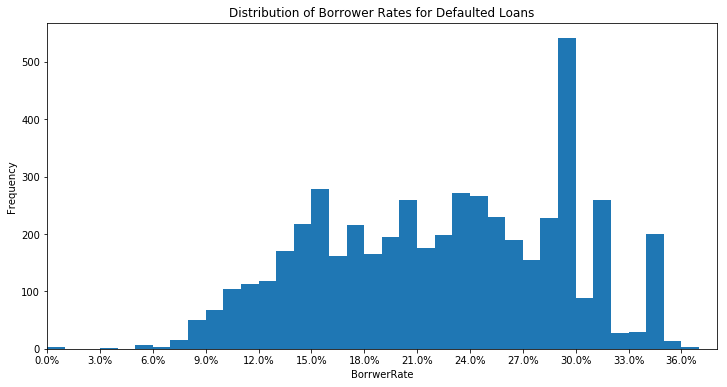

In [18]:
locs = np.arange(0,prosperLoanData.BorrowerRate.max()+0.03,0.03)
labels = ['{}%'.format(round(val*100,2)) for val in locs]

hist_plt = custom_filtered_hist_plot(df = prosperLoanData, 
                          x_col = "BorrowerRate", 
                          xscale = None, 
                          filter_column = {"LoanStatus":"Defaulted"}, step_size = 0.01, 
                          tick_locs = locs.tolist(), tick_labels = labels, axis_labels = {"x":"BorrwerRate","y": "Frequency","title":"Distribution of Borrower Rates for Defaulted Loans"})

hist_plt.set_xlim([0,0.38])

As one would expect, the borrower rate for loans that get defaulted appears to be skewed more towards the right side. It is likely because that there could have been other features in the data that could have warned the investors.

Now let's take a look at the distribution of the Borrower Rate for the loans that have delinquencies. This would mean LoanStatus having a value of "PastDue.." (meaning past the due date)


In [19]:
delinquent_loans_status

['Past Due (1-15 days)',
 'Past Due (16-30 days)',
 'Past Due (61-90 days)',
 'Past Due (31-60 days)',
 'Past Due (91-120 days)',
 'Past Due (>120 days)']

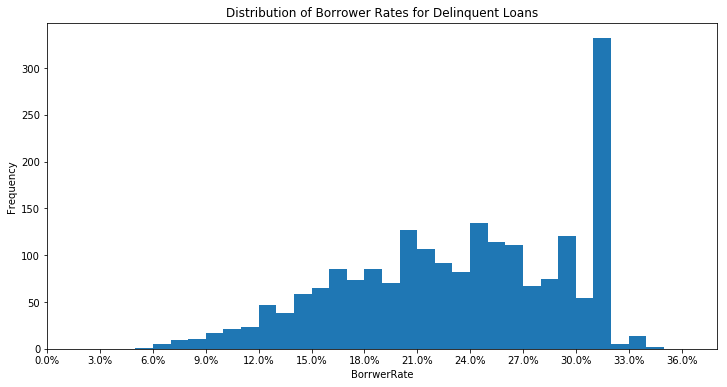

In [20]:
hist_plt = custom_filtered_hist_plot(df = prosperLoanData, 
                          x_col = "BorrowerRate", 
                          xscale = None, 
                          filter_column = {"LoanStatus":delinquent_loans_status}, step_size = 0.01, 
                          tick_locs = locs.tolist(), tick_labels = labels, axis_labels = {"x":"BorrwerRate","y":"Frequency", "title":"Distribution of Borrower Rates for Delinquent Loans"})
hist_plt = hist_plt.set_xlim([0,0.38]);


The same trend appears for the distribution of BorrowerRate for delinquent loans. Loans with a higher borrower rate could force one to make payments much less frequently.

### Q2: Have Delinquent and defaulted loans increased steadily? Which years have these two loan classes increased?

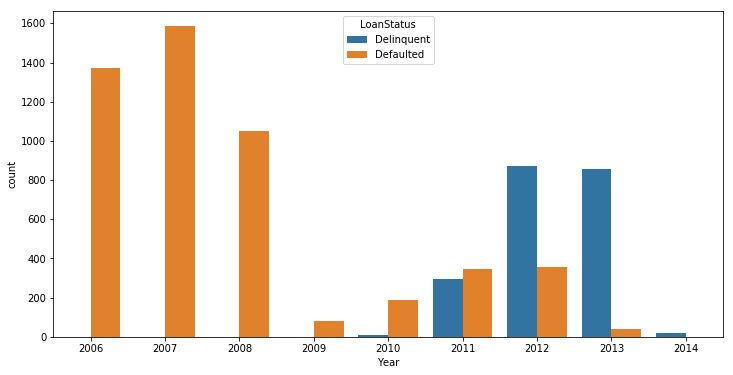

In [21]:
delinquent_loans_status = [val for val in prosperLoanData.LoanStatus.unique() if "Past Due" in val]
loan_status = delinquent_loans_status.copy()
loan_status.append("Defaulted")


data = prosperLoanData.loc[:,["LoanOriginationDate","LoanStatus"]]
data["Year"] = data["LoanOriginationDate"].apply(lambda x: x.year)
data = data.loc[data["LoanStatus"].isin(loan_status),:]
data.loc[data.LoanStatus.isin(delinquent_loans_status),"LoanStatus"] = "Delinquent"
fig = plt.figure(figsize = (12,6))
sb.countplot(data = data,x = "Year",hue="LoanStatus");


We see from the above chart that years 2006 to 2008 have contained the maximum defaulted loans. It is likely that Delinquent loans from years 2006 to 2008 were paid off as of the day this data was collected (which is April 2014).

An interesting years were years loans taken in 2009 and 2010, we do see that the number of defaulted loans have dropped more than 5 items from 1100 to about <100. One plausible reason for this could have been the economic recession that started in 2008. It is likely that the number of loans that have been purchased could have been lesser too in these 2 years.

However, starting from 2011, we find both the number of defaulted loans and delinqent loans have seen increases.

### Q4: For loans that were defaulted, how are the Loan amounts distributed?

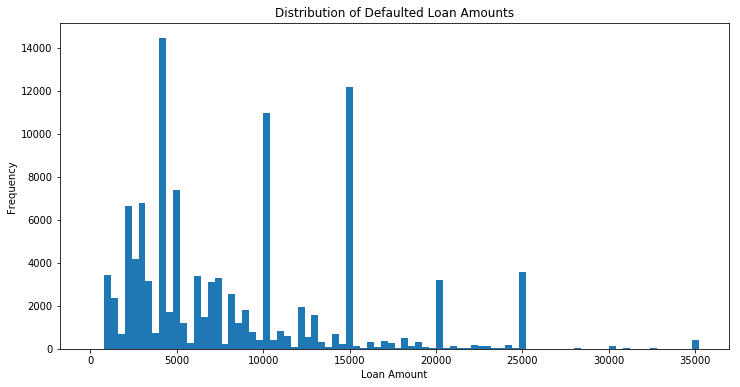

In [22]:
step_size = 1000

hist_plt = custom_filtered_hist_plot(df = prosperLoanData, 
                          x_col = "LoanOriginalAmount", 
                          xscale = None, 
                          step_size = 400, 
                          axis_labels = {"x":"Loan Amount","y":"Frequency", "title":"Distribution of Defaulted Loan Amounts"})

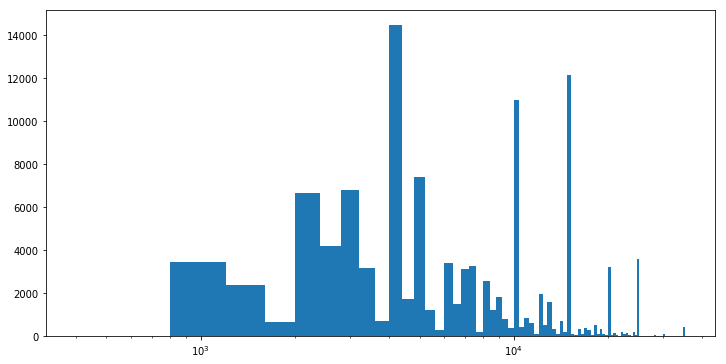

In [71]:
locs = [1000,2000,5000,10000,15000, 20000, 25000, 30000, 40000]
labels = ['{}'.format(val) for val in locs]

custom_filtered_hist_plot(df = prosperLoanData,
                          x_col = 'LoanOriginalAmount',
                          step_size = 400,
                          xscale='log',
                         tick_locs = locs,
                         tick_labels = labels)

### Q5. What are the top 3 occupations of borrowers that have paid their loans?

In [72]:
filtered = prosperLoanData[prosperLoanData.LoanStatus.isin(["Completed"])]
df = filtered.groupby(['Occupation']).LoanStatus.count()

In [73]:
df = df.reset_index().sort_values(by="LoanStatus",ascending=False)
df = df.reset_index(drop=True)
df = df.loc[:15,:]



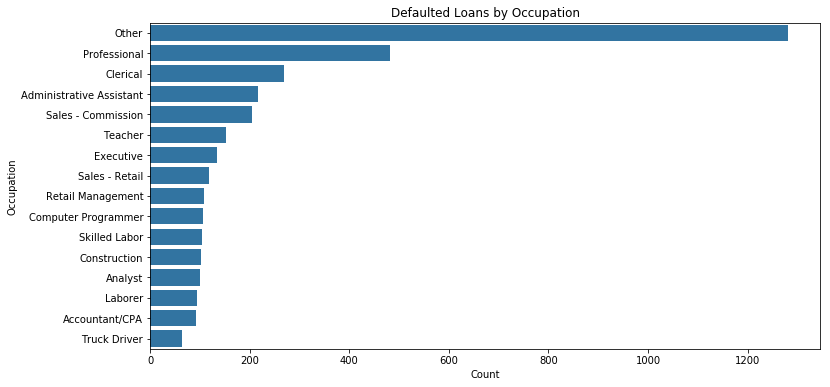

In [74]:
filtered = prosperLoanData[prosperLoanData.LoanStatus.isin(["Defaulted"])]
df = filtered.groupby(['Occupation']).LoanStatus.count()
df = df.reset_index().sort_values(by="LoanStatus",ascending=False)
df = df.reset_index(drop=True)
df = df.loc[:15,:]

plt.figure(figsize = (12,6))
color = sb.color_palette()[0]
sb.barplot(x = "LoanStatus",y = "Occupation",data = df,color=color)
plt.xlabel("Count")
plt.title("Defaulted Loans by Occupation");

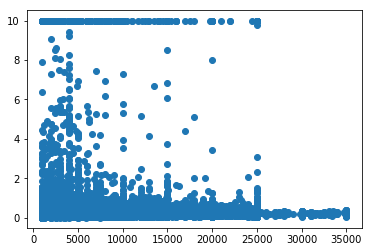

In [78]:
plt.scatter(y=prosperLoanData.DebtToIncomeRatio, x=prosperLoanData.LoanOriginalAmount)

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Your answer here!

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Your answer here!

## Bivariate Exploration


### Q6. Is there a relationship between debt-income ratio and the loan amount and borrower rate ?

In [93]:
prosperLoanData.IncomeRange.unique()

array(['$25,000-49,999', '$50,000-74,999', 'Not displayed', '$100,000+',
       '$75,000-99,999', '$1-24,999', 'Not employed', '$0'], dtype=object)

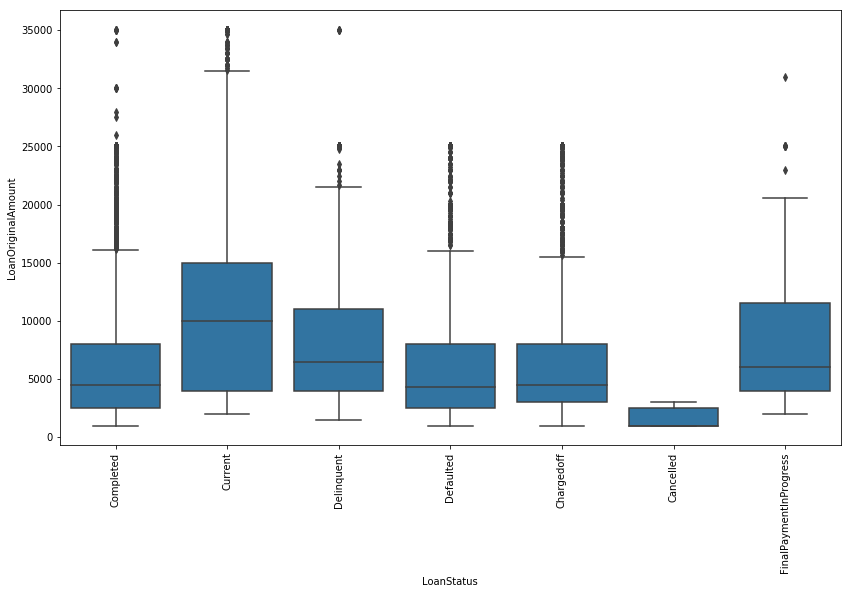

In [91]:
plt.figure(figsize = (14,8))
color = sb.color_palette()[0]
df = prosperLoanData
df.loc[df.LoanStatus.isin(delinquent_loans_status),"LoanStatus"] = "Delinquent" 
sb.boxplot(data = prosperLoanData, y = 'LoanOriginalAmount',x = 'LoanStatus',color = color)
plt.xticks(rotation = 90);

In [ ]:
sb.pairplot(data = prosperLoanData,x = '')

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!